In [11]:
import pandas as pd

# Load Titanic dataset
# NOTE: Make sure titanic.csv exists at this path or update the path accordingly.
# You can download from here.  https://www.kaggle.com/datasets/yasserh/titanic-dataset
titanic_path = "D:\Programming\AI_ML Expert\AI_ML Expert With Phitron Batch 01\Datasets/titanic-dataset.csv"  # change if needed
df_titanic = pd.read_csv(titanic_path)

print("First 10 rows of Titanic dataset:")
df_titanic.head(10)
     

First 10 rows of Titanic dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df_titanic.shape

(891, 12)

In [13]:
print("Unique values per column:")
df_titanic.nunique()
     

Unique values per column:


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
print("Missing values per column:")
df_titanic.isnull().sum()

Missing values per column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Distribution of Age Column:


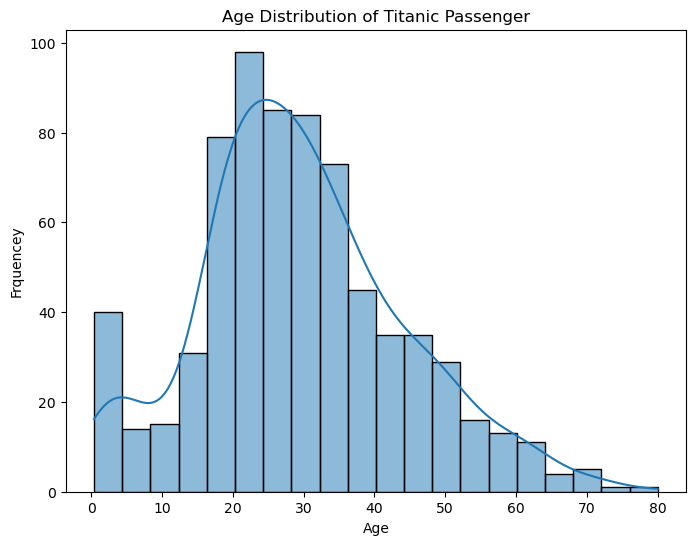

In [15]:
print("Distribution of Age Column:")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df_titanic["Age"], kde = True, bins = 20)
plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()
#We will use Median as the feature values are right skewed

Distribution of Embarked Column:


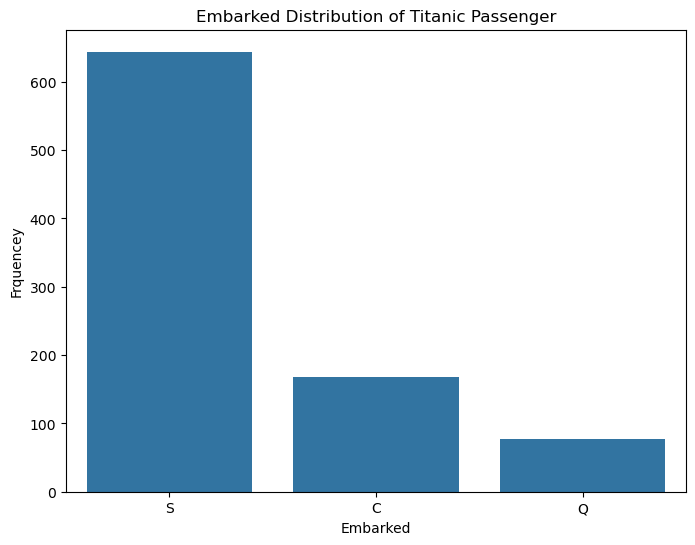

In [16]:
print("Distribution of Embarked Column:")
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic, x="Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked")
plt.ylabel("Frquencey")
plt.show()
#

In [17]:

# 1. Handle numeric missing values: Age
age_median = df_titanic["Age"].median()
df_titanic["Age"] = df_titanic["Age"].fillna(age_median)

# 2. Handle categorical missing values: Embarked
embarked_mode = df_titanic["Embarked"].mode()[0]
df_titanic["Embarked"] = df_titanic["Embarked"].fillna(embarked_mode)

# 3. Drop Cabin (too many missing values)
df_titanic = df_titanic.drop(columns=["Cabin"])

In [18]:
print("Missing values after handling:")
df_titanic.isnull().sum()

Missing values after handling:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:

from sklearn.preprocessing import LabelEncoder

# Load Heart dataset
heart_path = "heart.csv"  # change if needed
df_heart = pd.read_csv(heart_path)

print("First 10 rows of Heart dataset:")
display(df_heart.head(10))

print("\nColumn data types:")
display(df_heart.dtypes)

First 10 rows of Heart dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0



Column data types:


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

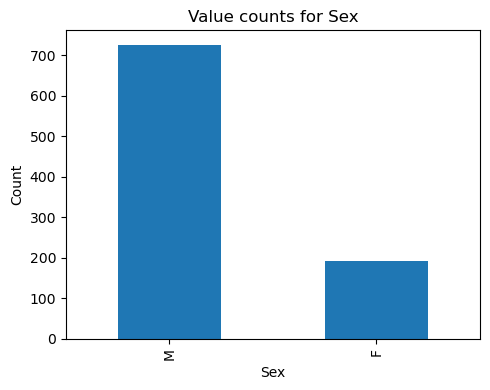

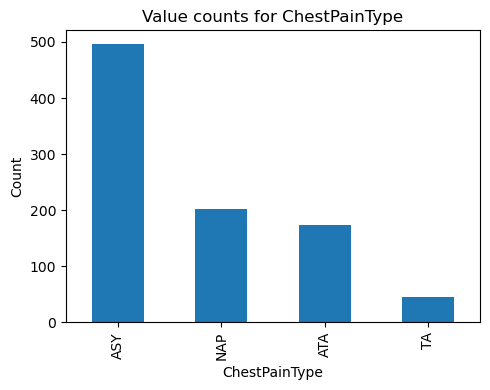

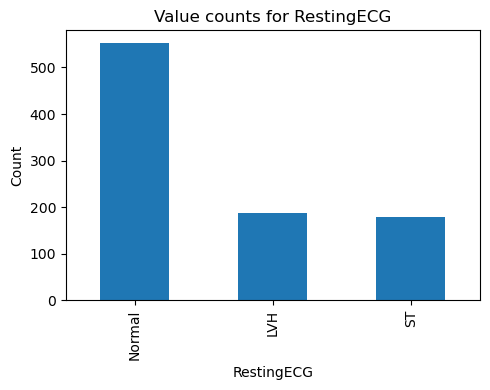

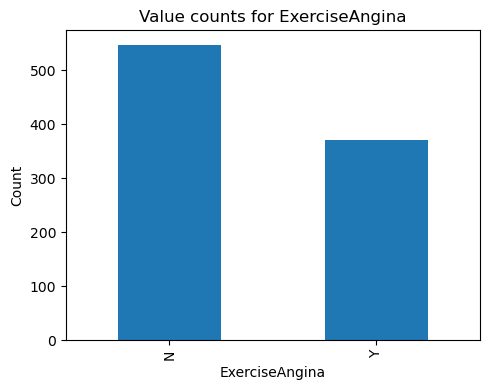

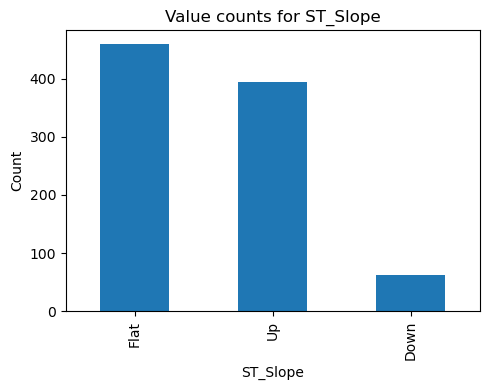

In [20]:
#Categorical Feature Exploration
categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  df_heart[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

In [21]:

# Label Encoding for binary categorical columns -> Sex and ExerciseAngina
le = LabelEncoder()
df_heart["Sex"] = le.fit_transform(df_heart["Sex"])
df_heart["ExerciseAngina"] = le.fit_transform(df_heart["ExerciseAngina"])

In [22]:
df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,0.0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,0,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,1,1.5,Flat,1
9,48,0,ATA,120,284,0,Normal,120,0,0.0,Up,0


In [23]:
# OneHot Encoding for nominal categorical columns
cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

df_heart_encoded = pd.get_dummies(
    df_heart,
    columns = cat_cols,
    dtype=int
)

In [24]:

df_heart_encoded.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,1,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,0,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,1,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,1,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [33]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assume df_heart_encoded is our working dataframe with target 'HeartDisease'
target_col = "HeartDisease"

X = df_heart_encoded.drop(columns=[target_col])
y = df_heart_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)



In [32]:
# Standard Scaling
scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)#mean and SD will be calcualted from X_train
X_test_std = scaler_sd.transform(X_test)

In [28]:
print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)
print("\nFirst 5 rows of X_train & X_test (Standard Scaled):")
display(X_train_std_df.head())
display(X_test_std_df.head())


--- Displaying Standard Scaled Data ---

First 5 rows of X_train & X_test (Standard Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.985202,-1.862131,0.373828,-0.061812,-0.532524,1.710544,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
30,-0.080384,0.537019,0.643819,2.946539,-0.532524,-0.247550,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
377,1.198319,0.537019,1.453793,-1.878000,1.877849,-0.567238,-0.845997,0.259340,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
535,0.239292,0.537019,-0.166155,-1.878000,-0.532524,-0.567238,1.182037,0.076994,0.905597,-0.480384,-0.530275,-0.213524,1.978455,-1.225487,-0.494088,-0.254981,0.962897,-0.851064
807,0.026175,0.537019,-1.354116,0.999959,-0.532524,0.791439,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999


In [29]:
# MinMax Scaling
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

In [31]:
print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_mm_df = pd.DataFrame(X_train_mm, columns = X_train.columns, index = X_train.index)
X_test_mm_df = pd.DataFrame(X_test_mm, columns = X_test.columns, index = X_test.index)
print("\nFirst 5 rows of X_train (Minmax Scaled):")
display(X_train_mm_df.head())
display(X_test_mm_df.head())


--- Displaying Standard Scaled Data ---

First 5 rows of X_train (Minmax Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.0,0.700,0.323383,0.0,0.899225,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,1.0,0.725,0.859038,0.0,0.519380,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,1.0,0.800,0.000000,1.0,0.457364,0.0,0.431818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.562500,1.0,0.650,0.000000,0.0,0.457364,1.0,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.520833,1.0,0.540,0.512438,0.0,0.720930,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
